In [1]:
#add matplotlib inline magic command 
%matplotlib inline 
#dependencies and setup 
import matplotlib.pyplot as plt
import pandas as pd 
import os
import matplotlib as mpl 


In [2]:
#file to load
city_data_to_load=os.path.join("resources","city_data.csv")
ride_data_to_load=os.path.join("resources","ride_data.csv")

In [3]:
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#get the columns and the rows that are not null 
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#get the columns and the rows that are not null 
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#get the data types of each column 
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#get the unique values of the type of city 
city_data_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Now we can use the sum() method on the city_data_df for the type column where the condition equals either Urban, Suburban, or Rural.
#To get the number of data points for the Urban cities, add the following code to a new cell:

#get the number of data points from teh urgan cities 
sum((city_data_df["type"]=="Suburban"))#|(city_data_df["type"]=="Rural"))


36

In [10]:
#get the columns and the rows that are not null 
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
#get the data types of each column 
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# Combine the data into a single dataset 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])


#display the DataFrame
pyber_data_df.head(15)



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [14]:
#create data frames to seperate based on type
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]



In [15]:
#get the number of rides for cities 
urban_ride_count = urban_cities_df.groupby(["city"])["ride_id"].count()
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [16]:
#Get average fare for each city in the urban cities 
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
subruban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]




In [17]:
# get the average driver count for the cities 
urban_driver_count = urban_cities_df.groupby(["city"]).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(["city"]).mean()['driver_count']


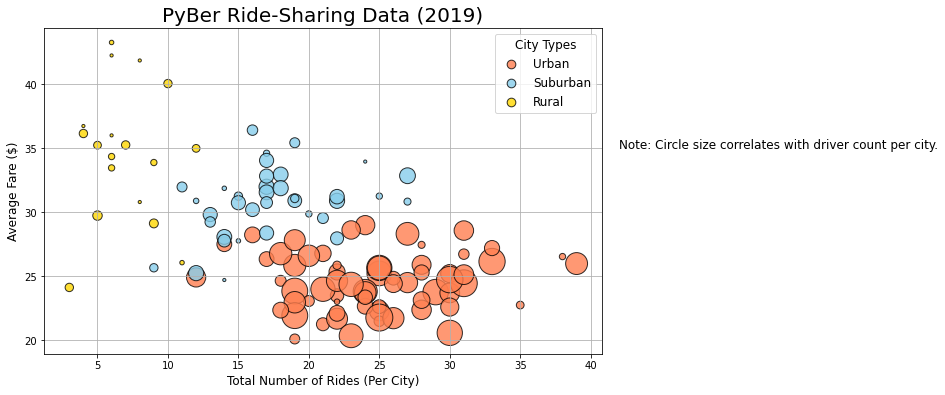

In [18]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      subruban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")


# Add the legend.
#plt.lgnd()
# Show the plot

# Save the figure.

plt.savefig("analysis/Fig1.png")

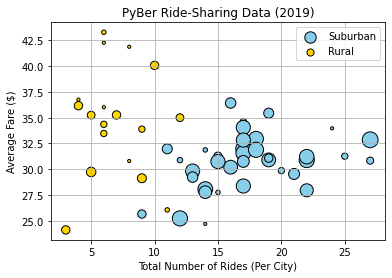

In [19]:
# Create chart for suburban cities 
plt.scatter(suburban_ride_count,subruban_avg_fare,
           s = 10*suburban_driver_count,
            c = "skyblue",
            edgecolor="black",
            linewidth = 1,
            label = "Suburban"
                    
           )
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

plt.scatter(rural_ride_count,rural_avg_fare,
           s = 10*rural_driver_count,
            c = "gold",
            edgecolor="black",
            linewidth = 1,
            label = "Rural"
                    
           )
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

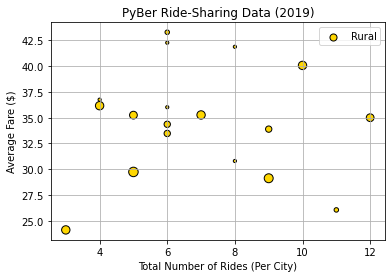

In [20]:
plt.scatter(rural_ride_count,rural_avg_fare,
           s = 10*rural_driver_count,
            c = "gold",
            edgecolor="black",
            linewidth = 1,
            label = "Rural"
                    
           )
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

In [21]:
#Get summary statistics 
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [22]:
# Get summary statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [23]:
# Get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [24]:
#calculate the mean of the ride count for each city type 
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)



(24.62, 17.36, 6.94)

In [25]:
import numpy as np 
import scipy.stats as sts 

In [26]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {median_urban_ride_count:.2f}")


mode_suburban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride subcounts for urban trips is {mean_suburban_ride_count:.2f}")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The mean for the ride subcounts for urban trips is {median_suburban_ride_count:.2f}")


mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mean for the ride subcounts for urban trips is {mode_suburban_ride_count}")



mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride subcounts for urban trips is {mean_rural_ride_count:.2f}")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The mean for the ride subcounts for rural trips is {median_rural_ride_count:.2f}")


mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mean for the ride subcounts for urban trips is {mode_rural_ride_count}")





The mean for the ride counts for urban trips is 24.62
The mean for the ride counts for urban trips is 24.00
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).
The mean for the ride subcounts for urban trips is 17.36
The mean for the ride subcounts for urban trips is 17.00
The mean for the ride subcounts for urban trips is ModeResult(mode=array([17]), count=array([7]))
The mean for the ride subcounts for urban trips is 6.94
The mean for the ride subcounts for rural trips is 6.00
The mean for the ride subcounts for urban trips is ModeResult(mode=array([6]), count=array([5]))


In [27]:
# Get the fares for the urban cities 
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
urban_fares.head()


0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [28]:
    # Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares= np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

    # Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares= np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")

    # Calculate the measures of central tendency for the average fare for the rural cities.

mean_rural_fares= np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")




The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [29]:
#Get the driver count 
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

# Calculate the measures of central tendency for the average driver for the urban cities.
mean_urban_drivers= np.mean(urban_drivers)
print(f"The mean drivers for urban areas is {mean_urban_drivers:.0f}.")

median_urban_drivers= np.median(urban_drivers)
print(f"The median drivers for urban areas is {median_urban_drivers:.0f}.")

mode_urban_drivers= sts.mode(urban_drivers)
print(f"The mode drivers for urban areas is {mode_urban_drivers}.")


    # Calculate the measures of central tendency for the average driver for the suburban cities.
mean_suburban_drivers= np.mean(suburban_drivers)
print(f"The mean drivers for suburban areas is {mean_suburban_drivers:.0f}.")

median_suburban_drivers= np.median(suburban_drivers)
print(f"The median drivers for suburban areas is {median_suburban_drivers:.0f}.")

mode_suburban_drivers= sts.mode(suburban_drivers)
print(f"The mode drivers for suburban areas is {mode_suburban_drivers}.")

    # Calculate the measures of central tendency for the average drivre for the rural cities.

mean_rural_drivers= np.mean(rural_drivers)
print(f"The mean drivers for rural areas is {mean_rural_drivers:.0f}.")

median_rural_drivers= np.median(rural_drivers)
print(f"The median drivers for rural areas is {median_rural_drivers:.0f}.")

mode_rural_drivers= sts.mode(rural_drivers)
print(f"The mode drivers for rural areas is {mode_rural_drivers}.")




The mean drivers for urban areas is 37.
The median drivers for urban areas is 37.
The mode drivers for urban areas is ModeResult(mode=array([39]), count=array([86])).
The mean drivers for suburban areas is 14.
The median drivers for suburban areas is 16.
The mode drivers for suburban areas is ModeResult(mode=array([20]), count=array([79])).
The mean drivers for rural areas is 4.
The median drivers for rural areas is 4.
The mode drivers for rural areas is ModeResult(mode=array([1]), count=array([32])).


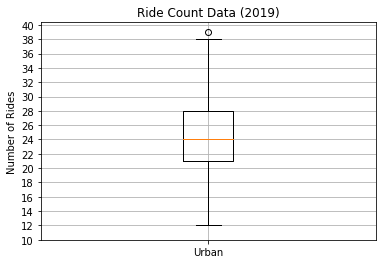

In [30]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()





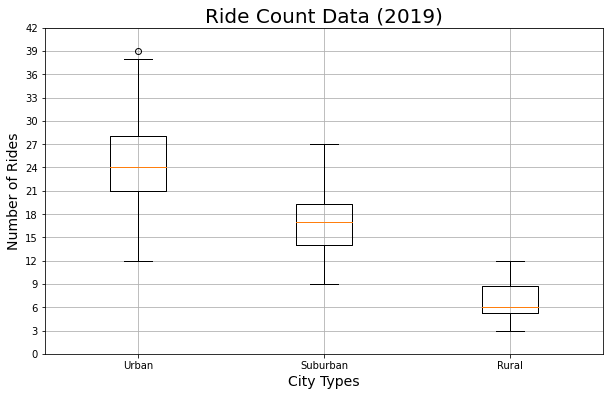

In [31]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()




In [32]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


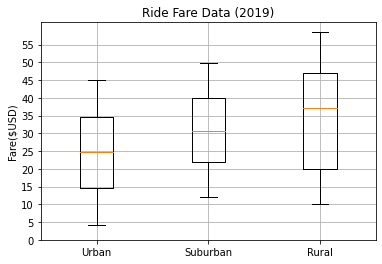

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [33]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban","Rural"]
fare_data=[urban_fares,suburban_fares,rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")



plt.show()
print("Summary Statistics")
urban_fares.describe()


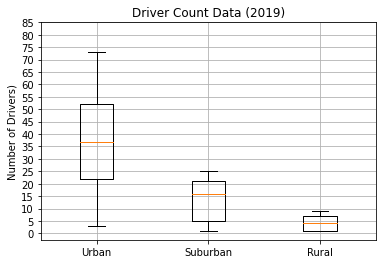

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [34]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(ride_count_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()




plt.savefig("analysis/Fig4.png")

plt.show()
print("Summary Statistics")
urban_drivers.describe()



In [35]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [36]:
# Get the sum of all the fares 
total_fares= float(pyber_data_df["fare"].sum())
total_fares

63538.64

In [37]:
type_percents = 100 * (sum_fares_by_type) / (total_fares)
type_percents





type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [38]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

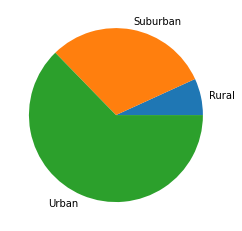

In [39]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()







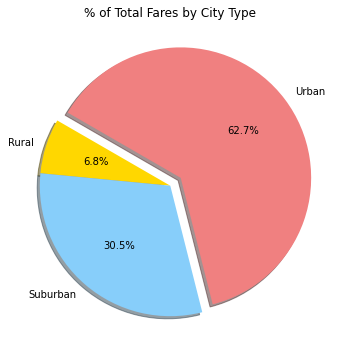

In [40]:
# Build the percentage of fares by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
        labels=["Rural","Suburban","Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title("% of Total Fares by City Type")
       
mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig5.png")
plt.show()




In [41]:
# calculate the percentage of rides for each city type
ride_percents = 100*((pyber_data_df.groupby(["type"]).count()["ride_id"])/pyber_data_df["ride_id"].count())
ride_percents                    
                     
                     
            
                     
                     

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

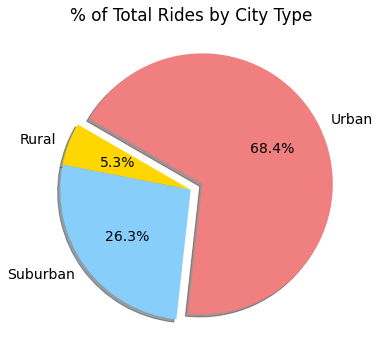

In [42]:
# build percentage of rides by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
            labels=["Rural","Suburban", "Urban"],
            colors=["gold","lightskyblue","lightcoral"],
            explode=[0,0,0.1],
            autopct='%1.1f%%',
            shadow=True,
            startangle=150)
plt.title("% of Total Rides by City Type")
#change the default font size from 10 to 14
mpl.rcParams["font.size"]=14
plt.savefig('analysis/Fig6.png')
plt.show()









In [45]:
driver_percents = 100*(city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum())
driver_percents



type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

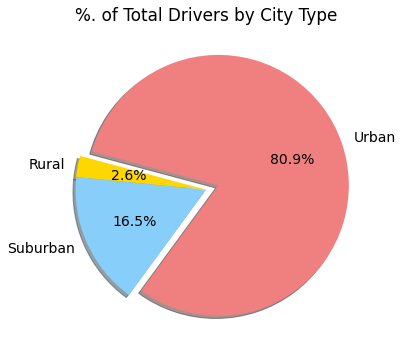

In [49]:
plt.subplots(figsize=(10,6))
plt.pie(driver_percents,
    labels=["Rural","Suburban","Urban"],
    colors=["gold","lightskyblue","lightcoral"],
    explode=[0,0,0.1],
    autopct="%1.1f%%",
    shadow=True,
    startangle=165,
    
       )
plt.title("%. of Total Drivers by City Type")
# change the default font size from 10 to 14
mpl.rcParams["font.size"]=14
#save the figure
plt.savefig("analysis/Fig7.png")
plt.show()



